In [ ]:
!pip install -U -q PyDrive

In [ ]:
!pip install -U -q PyDrive2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.0 MB/s eta 0:00:00


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()

drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/datadeoxy/combined_deoxyentropy.csv')

In [ ]:
#print(df.head(10))

In [ ]:
#print(df.iloc[:,0])#0th column

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
data=[]
combined_df=pd.DataFrame(data)
for j in range(0,26):
    data=[]
    for i in range(0,27,3):
        data.append(df.iloc[i:i+27,j].tolist())
    newdf=pd.DataFrame(data)
    combined_df = pd.concat([combined_df, newdf.T])
    print(newdf.T)

combined_df.to_csv('deoxy_entropy.csv')  # Replace 'your_file.csv' with your desired filename
#print(combined_df)

# Select the first 9 columns for PCA
data = combined_df.iloc[:, :36]

# Create a PCA instance with n_components=1 to reduce dimensions to a single column
pca = PCA(n_components=1)

# Fit and transform the data
reduced_data = pca.fit_transform(data)

# Create a new DataFrame with the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=['entropy'])

print(reduced_df)
reduced_df.to_csv('/content/gdrive/MyDrive/datadeoxy/reduced_entropy.csv', index=False)

           0         1         2         3         4         5         6  \
0   0.004303  0.004744  0.005492  0.004129  0.004577  0.005775  0.005206   
1   0.006231  0.004866  0.005167  0.005050  0.004798  0.006443  0.006946   
2   0.004480  0.007601  0.006225  0.005297  0.006563  0.006295  0.006679   
3   0.004744  0.005492  0.004129  0.004577  0.005775  0.005206  0.003962   
4   0.004866  0.005167  0.005050  0.004798  0.006443  0.006946  0.006974   
5   0.007601  0.006225  0.005297  0.006563  0.006295  0.006679  0.005917   
6   0.005492  0.004129  0.004577  0.005775  0.005206  0.003962  0.005913   
7   0.005167  0.005050  0.004798  0.006443  0.006946  0.006974  0.007275   
8   0.006225  0.005297  0.006563  0.006295  0.006679  0.005917  0.007272   
9   0.004129  0.004577  0.005775  0.005206  0.003962  0.005913  0.006733   
10  0.005050  0.004798  0.006443  0.006946  0.006974  0.007275  0.006454   
11  0.005297  0.006563  0.006295  0.006679  0.005917  0.007272  0.007082   
12  0.004577

In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/datadeoxy/reduced_mean.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/datadeoxy/reduced_std.csv')
df3 = pd.read_csv('/content/gdrive/MyDrive/datadeoxy/reduced_max.csv')
df4 = pd.read_csv('/content/gdrive/MyDrive/datadeoxy/reduced_min.csv')
df5 = pd.read_csv('/content/gdrive/MyDrive/datadeoxy/reduced_slope.csv')
df6 = pd.read_csv('/content/gdrive/MyDrive/datadeoxy/reduced_skew.csv')
df7 = pd.read_csv('/content/gdrive/MyDrive/datadeoxy/reduced_entropy.csv')

df = pd.concat([df1, df2, df3,df4, df5, df6,df7], axis=1)
#print(combined_df)
df.to_csv('/content/gdrive/MyDrive/datadeoxy/reduced_combined.csv', index=False)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/datadeoxy/reduced_combined.csv')



In [ ]:
import pandas as pd
import numpy as np

numbers = np.repeat(np.arange(1, 27), 27)  # Create 1 to 26, each repeated 3 times

# Insert the new column as the first column
df.insert(0, 'partcipant_ID', numbers)
# Values to repeat in the new column
values = [0,1,1]

# Create the new column directly with the appropriate length
df['target'] = values * (len(df) // len(values))  # Adjust repetition for 78 rows


In [ ]:

print(df)

     partcipant_ID          mean       std       max       min         slope  \
0                1  2.436204e-18  0.004889  0.010265  0.010082  1.091425e-05   
1                1 -1.825536e-18  0.003809  0.005441  0.006257 -2.692509e-06   
2                1  6.070214e-19 -0.000206  0.000493 -0.000199 -9.893764e-07   
3                1  7.544034e-19  0.005093  0.010693  0.010081  7.669528e-06   
4                1  1.346567e-19  0.003574  0.005256  0.006259  6.023817e-06   
..             ...           ...       ...       ...       ...           ...   
697             26  1.917919e-20 -0.000909 -0.001203 -0.001434  1.918968e-06   
698             26  6.399079e-20 -0.000798 -0.001247 -0.000451 -4.636859e-07   
699             26  6.371204e-20 -0.000610 -0.000665 -0.001162  1.501615e-06   
700             26  2.031066e-20 -0.001027 -0.001423 -0.001689  6.931160e-07   
701             26 -3.364239e-21 -0.000990 -0.001483 -0.001380  8.011055e-08   

         skew   entropy  target  
0   -

In [ ]:
col=['Participant']
for i in ['mean','std','Max','Min','Slope', 'Skewness','entropy']:

        col.append(i)
col.append('target')
print(col)

['Participant', 'mean', 'std', 'Max', 'Min', 'Slope', 'Skewness', 'entropy', 'target']


In [ ]:
df.columns=col
df.columns

Index(['Participant', 'mean', 'std', 'Max', 'Min', 'Slope', 'Skewness',
       'entropy', 'target'],
      dtype='object')

In [ ]:
df['target'].value_counts()

1    468
0    234
Name: target, dtype: int64

In [ ]:
X = df.drop(['target'], axis=1)

y = df['target']

In [ ]:
df.isnull().sum()

Participant    0
mean           0
std            0
Max            0
Min            0
Slope          0
Skewness       0
entropy        0
target         0
dtype: int64

In [ ]:
round(df.describe(),2)

,Participant,mean,std,Max,Min,Slope,Skewness,entropy,target
count,702.00,702.0,702.00,702.00,702.00,702.0,702.00,702.00,702.00
mean,13.50,0.0,0.00,0.00,0.00,-0.0,-0.00,0.00,0.67
std,7.51,0.0,0.00,0.00,0.00,0.0,0.74,0.00,0.47
min,1.00,-0.0,-0.00,-0.00,-0.00,-0.0,-2.43,-0.01,0.00
25%,7.00,-0.0,-0.00,-0.00,-0.00,-0.0,-0.47,-0.00,0.00
50%,13.50,-0.0,-0.00,-0.00,-0.00,0.0,0.02,-0.00,1.00
75%,20.00,0.0,0.00,0.00,0.00,0.0,0.48,0.00,1.00
max,26.00,0.0,0.01,0.01,0.01,0.0,2.82,0.01,1.00


Text(0, 0.5, 'Skewness')

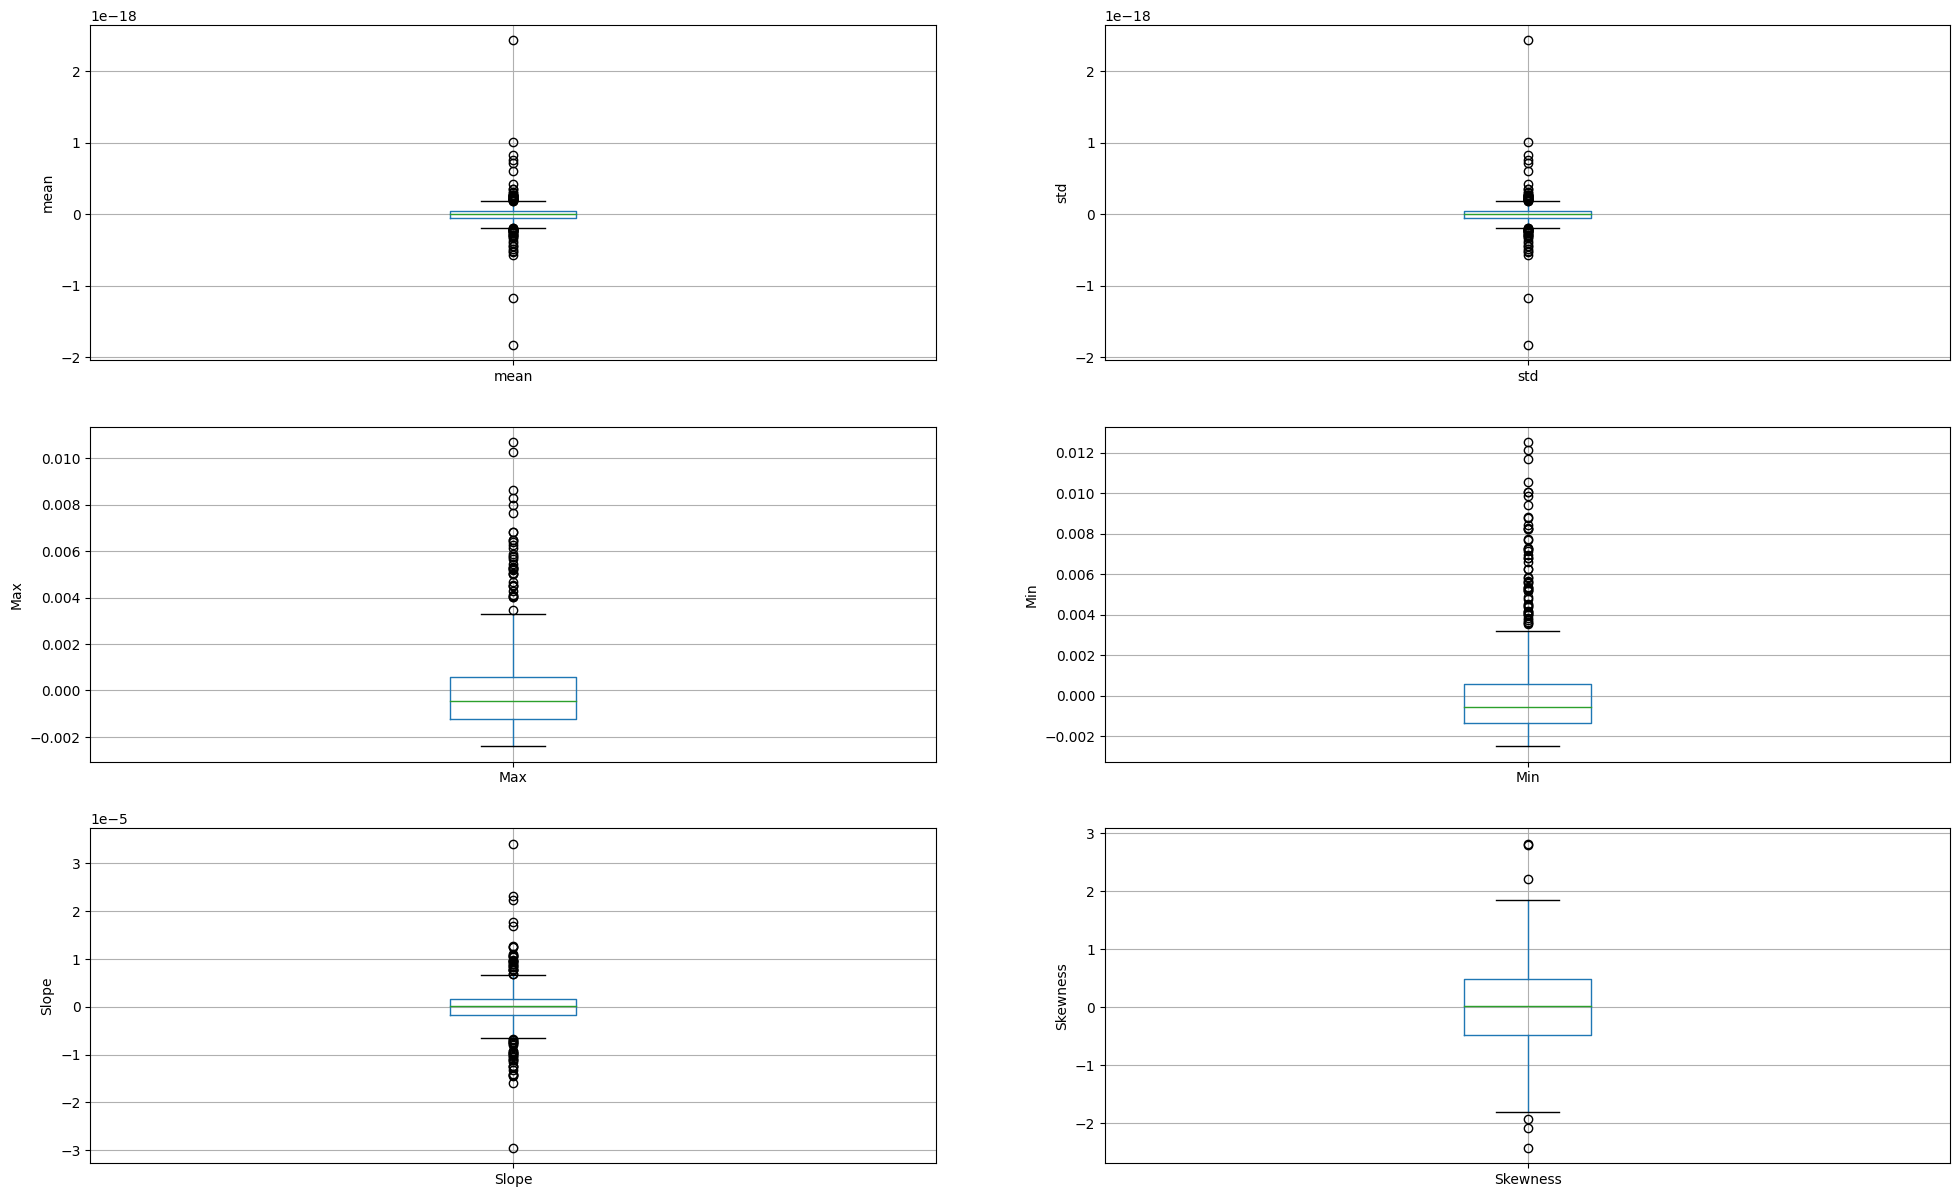

In [ ]:
'''
import matplotlib.pyplot as plt # for data visualization
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='mean')
fig.set_title('')
fig.set_ylabel('mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='std')
fig.set_title('')
fig.set_ylabel('std')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='Max')
fig.set_title('')
fig.set_ylabel('Max')





plt.subplot(4, 2, 4)
fig = df.boxplot(column='Min')
fig.set_title('')
fig.set_ylabel('Min')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='Slope')
fig.set_title('')
fig.set_ylabel('Slope')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='Skewness')
fig.set_title('')
fig.set_ylabel('Skewness')
'''


In [ ]:

X = df.drop(['target'], axis=1)

y = df['target']


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:

X_train.shape, X_test.shape

((561, 8), (141, 8))

In [ ]:

import pandas as pd

df = pd.DataFrame(X_train)  # Assuming X_train is your NumPy array
cols = df.columns  # Now you can access columns

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:

X_train.describe()

,Participant,mean,std,Max,Min,Slope,Skewness,entropy
count,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02
mean,1.298229e-16,-1.899847e-17,1.899847e-17,1.583206e-17,7.916029e-18,2.374809e-17,2.216488e-17,1.899847e-17
std,1.000892e+00,1.000892e+00,1.000892e+00,1.000892e+00,1.000892e+00,1.000892e+00,1.000892e+00,1.000892e+00
min,-1.652788e+00,-3.427478e+00,-1.212442e+00,-1.300590e+00,-1.111814e+00,-6.808080e+00,-2.810403e+00,-2.287611e+00
25%,-8.503528e-01,-3.402045e-01,-6.874020e-01,-6.663174e-01,-5.927322e-01,-3.915179e-01,-6.554854e-01,-7.918704e-01
50%,-4.791727e-02,-2.956589e-02,-2.155722e-01,-2.391674e-01,-2.406631e-01,1.910998e-02,5.703483e-02,-1.909352e-02
75%,8.882575e-01,2.579868e-01,4.151264e-01,3.777313e-01,2.335826e-01,4.145605e-01,6.720407e-01,5.679685e-01
max,1.690693e+00,1.449054e+01,4.635158e+00,5.704441e+00,5.491704e+00,5.364342e+00,3.720161e+00,2.923890e+00


In [ ]:

from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7092


In [ ]:
pip install scikit-learn

In [ ]:

from sklearn.model_selection import GridSearchCV

# instantiate classifier with rbf kernel and C=100
model=SVC()


# Define hyperparameter grid with different kernels and C values
param_grid = {'C': [ 0.1, 1, 10, 100, 500],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

for kernel in param_grid['kernel']:
    # Isolate current kernel and include C values
    kernel_params = {'kernel': [kernel], 'C': param_grid['C']}

    # Choose appropriate search method based on parameter space size
    if len(kernel_params) >= 20:
        search_method = RandomizedSearchCV(SVC(), kernel_params, n_iter=20, cv=5, scoring='accuracy')
    else:
        search_method = GridSearchCV(SVC(), kernel_params, cv=5, scoring='accuracy')

    # Create and fit a model with the current kernel and C values
    search_method.fit(X_train, y_train)

    # Obtain best model and evaluate on testing set
    best_model = search_method.best_estimator_
    accuracy = best_model.score(X_test, y_test)

    # Print accuracy for the current kernel
    print(f"Accuracy for kernel '{kernel}': {accuracy:.4f}")

Accuracy for kernel 'linear': 0.7234
Accuracy for kernel 'rbf': 0.7163
Accuracy for kernel 'poly': 0.7234
Accuracy for kernel 'sigmoid': 0.6950
